# Medical Cost Personal Insurance Project

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Import scikit-learn modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor,
)
from xgboost import XGBRegressor

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Display the first few rows of the DataFrame for a quick overview
# This helps in understanding the structure of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display information about the DataFrame
# This includes data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This conveys the key information succinctly, emphasizing the absence of null values and the suitability of data types in the DataFrame.

In [5]:
# Displaying general statistical summary of numerical variables
# This includes count, mean, standard deviation, minimum, 25th percentile (Q1),
# median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This summary provides insights into the central tendency and spread of the numerical data.The output suggests that certain numerical columns may represent categorical data,as their values are discrete and could be better represented with integer or float data types.

In [6]:
# Displaying general statistical summary of categorical variables
# This includes count, unique, top (most frequent value), and frequency of the top value.
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


This summary offers a glimpse into the distribution and features of the categorical data in the dataset.According to the describe results, the dataset prominently features certain variables that are consistently at the top and occur more frequently. These include "male" for gender, "non-smoker" for smoking status, and "southeast" for the region.

In [7]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

1

Executing this allows for a rapid assessment and quantification of duplicate rows within your dataset.

In [8]:
# Removing duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

This helps in maintaining a dataset with unique rows, enhancing data quality and preventing redundancy.

In [9]:
# Counting the number of unique values in each column of the DataFrame
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

This summary reveals the count of distinct values for each column, offering insights into the diversity of data across the DataFrame.

# DATA VISUALIZATION

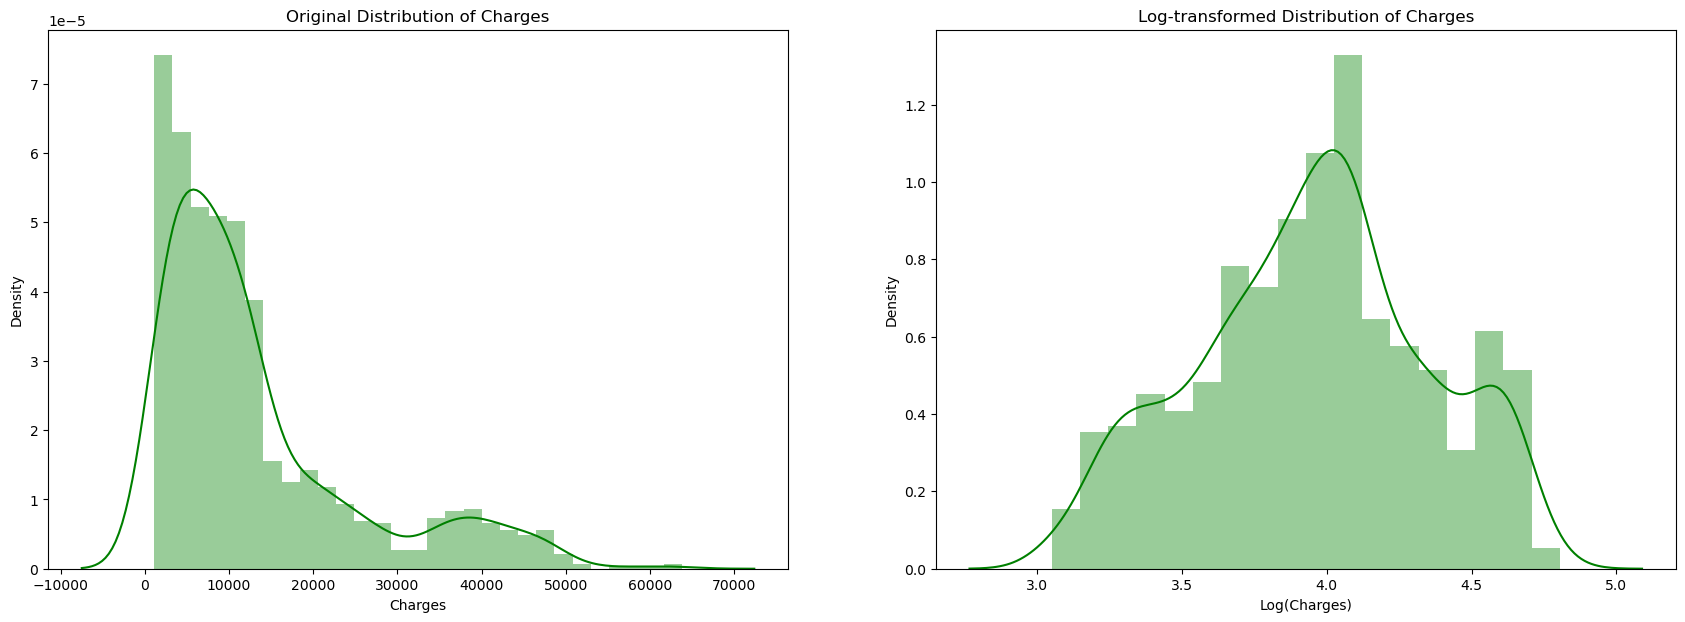

In [10]:
# Distribution of the charges
# Creating a figure 
plt.figure(figsize=(21,7))

# Subplot 1: Original distribution plot
plt.subplot(1, 2, 1)
sns.distplot(df['charges'], color='g')
plt.title('Original Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

# Subplot 2: Distribution plot after applying natural log transformation
plt.subplot(1, 2, 2)
sns.distplot(np.log10(df['charges']), color='g')
plt.title('Log-transformed Distribution of Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Density')

# Display the plots
plt.show()

The right-skewed distribution of charges prompted the application of the natural log transformation to achieve a more approximately normal distribution.

# VISUALIZING THE DISTRIBUTION OF NUMERICAL VARIABLES IN RELATION TO MEDICAL CHARGES.

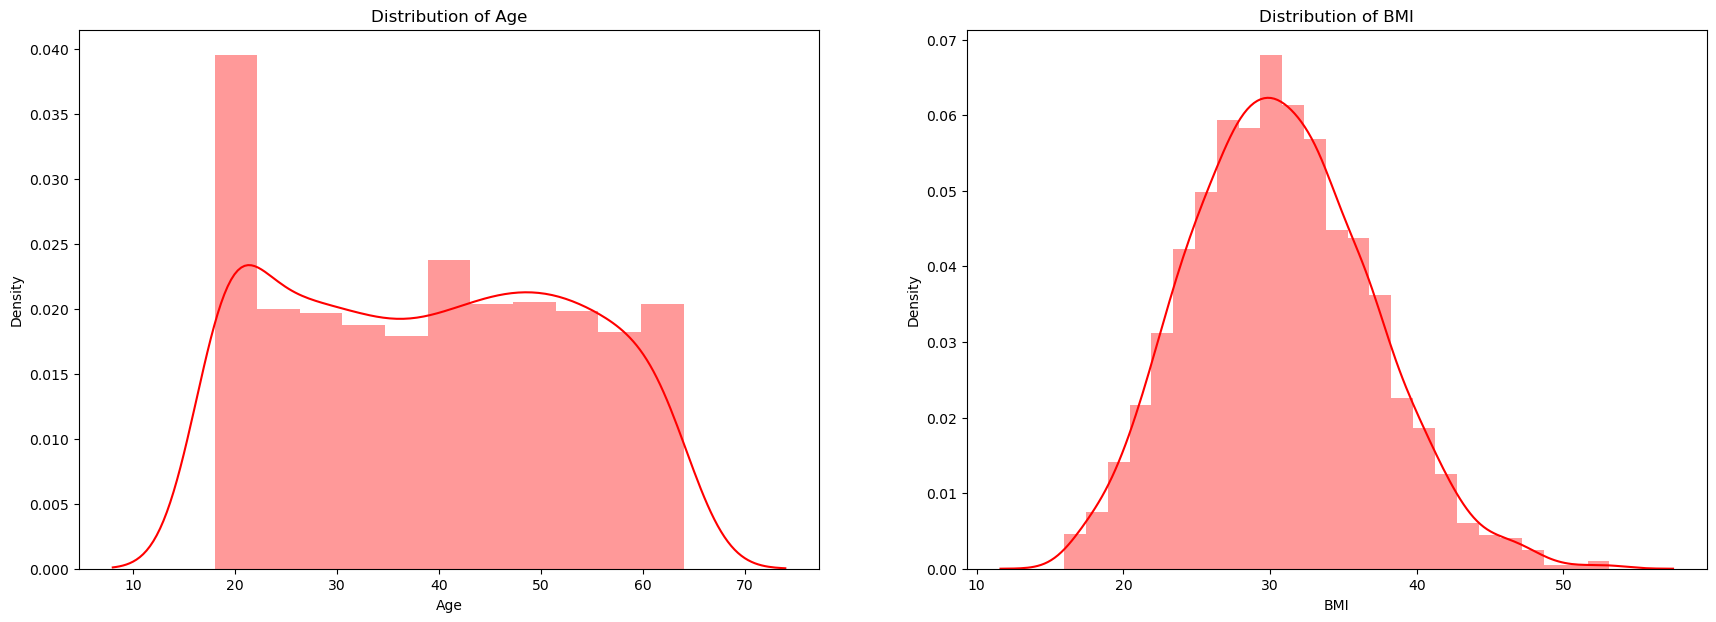

In [11]:
# Creating a figure 
plt.figure(figsize=(21, 7))

# Subplot 1: Distribution plot for the 'age' column
plt.subplot(1, 2, 1)
sns.distplot(df['age'], color='r')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Subplot 2: Distribution plot for the 'bmi' column
plt.subplot(1, 2, 2)
sns.distplot(df['bmi'], color='r')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')

# Displaying the plots
plt.show()

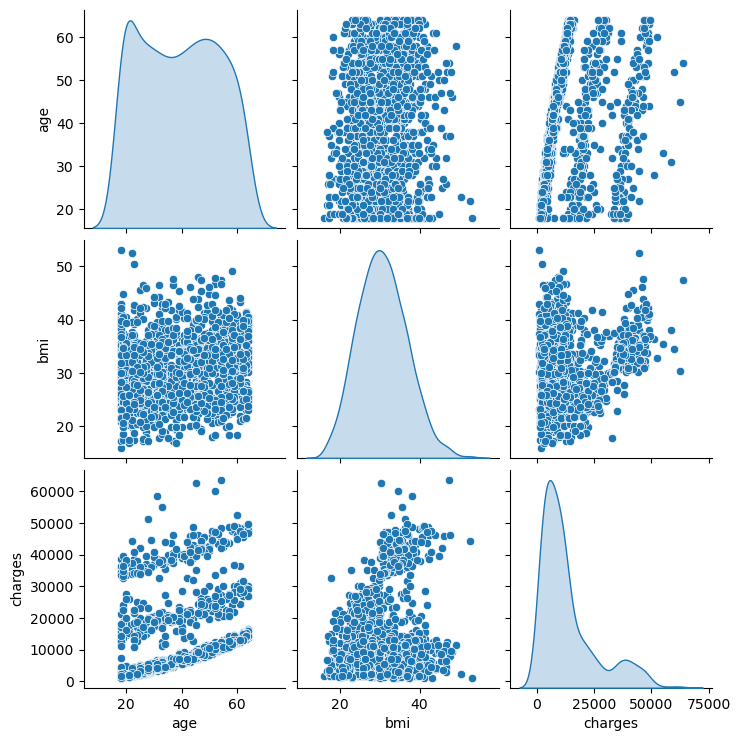

In [12]:
# Creating a DataFrame with selected numerical columns
df_num = df[['age', 'bmi', 'charges']]

# Generating a pairplot for Age, BMI, and Charges
# The diag_kind='kde' parameter adds kernel density estimates on the diagonal
sns.pairplot(df_num, diag_kind='kde')

# Displaying the pairplot
plt.show()

The pairplot indicates a linear relationship between age, BMI, and medical charges.

# VISUALIZING CATEGORICAL VARIABLES INDIVIDUALLY IN RELATION TO MEDICAL CHARGES

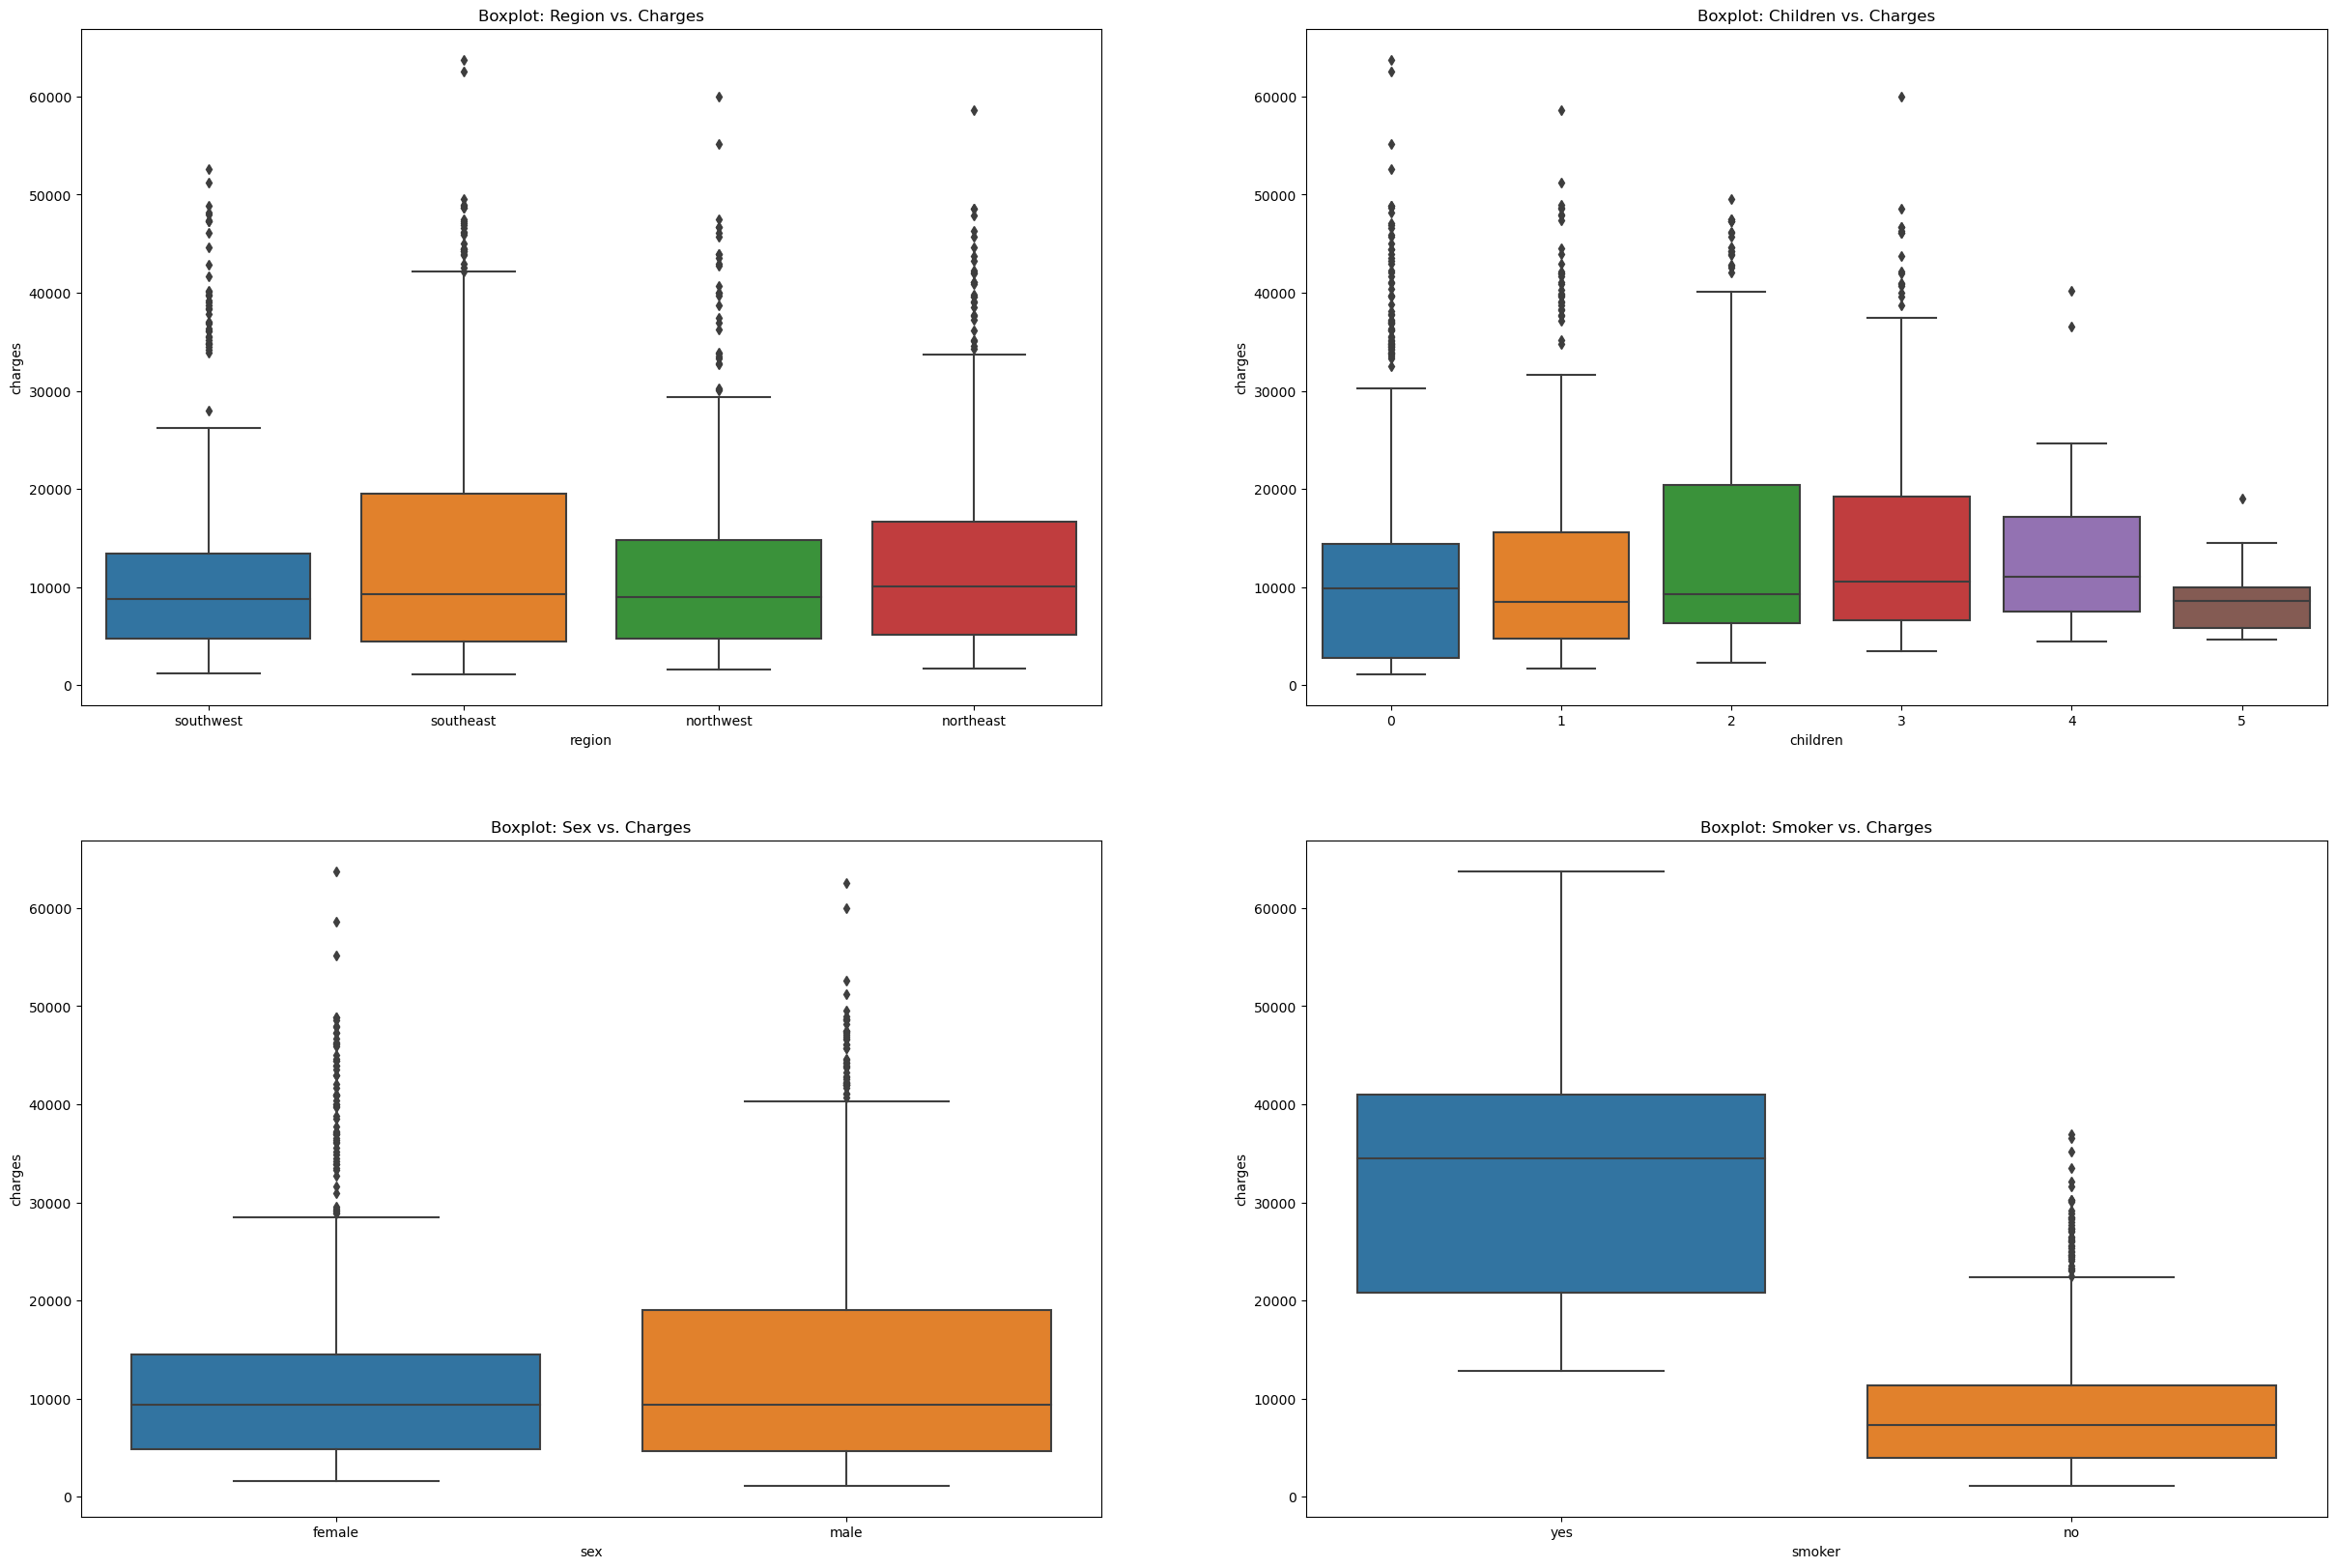

In [13]:
# Creating a figure 
plt.figure(figsize=(30, 20))

# Subplot 1: Boxplot for 'region' vs. 'charges'
plt.subplot(2, 2, 1)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Boxplot: Region vs. Charges')

# Subplot 2: Boxplot for 'children' vs. 'charges'
plt.subplot(2, 2, 2)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Boxplot: Children vs. Charges')

# Subplot 3: Boxplot for 'sex' vs. 'charges'
plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Boxplot: Sex vs. Charges')

# Subplot 4: Boxplot for 'smoker' vs. 'charges'
plt.subplot(2, 2, 4)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Boxplot: Smoker vs. Charges')

# Displaying the plots
plt.show()

Based on the observations from the box plots:

Region: The Southeast region exhibits the highest data distribution between the 50th and 75th percentiles compared to other regions.

Children: Individuals with 2 children show the highest distribution between the 50th and 75th percentiles among all categories.

Gender: The data has a slight bias towards males, with a higher interquartile range for males compared to females. The gender distribution in the data is approximately 50.5% for males and 49.5% for females.

Smoking Behavior: About 21% of the data consists of smokers. The median for smokers is notably higher than that for non-smokers.

These insights provide a glimpse into the influence of individual variables on medical charges. To delve deeper into the combined effects of factors on medical charges, further analysis is needed.

# EXPLORING RELATIONSHIPS BETWEEN TWO VARIABLES THROUGH BIVARIATE ANALYSIS

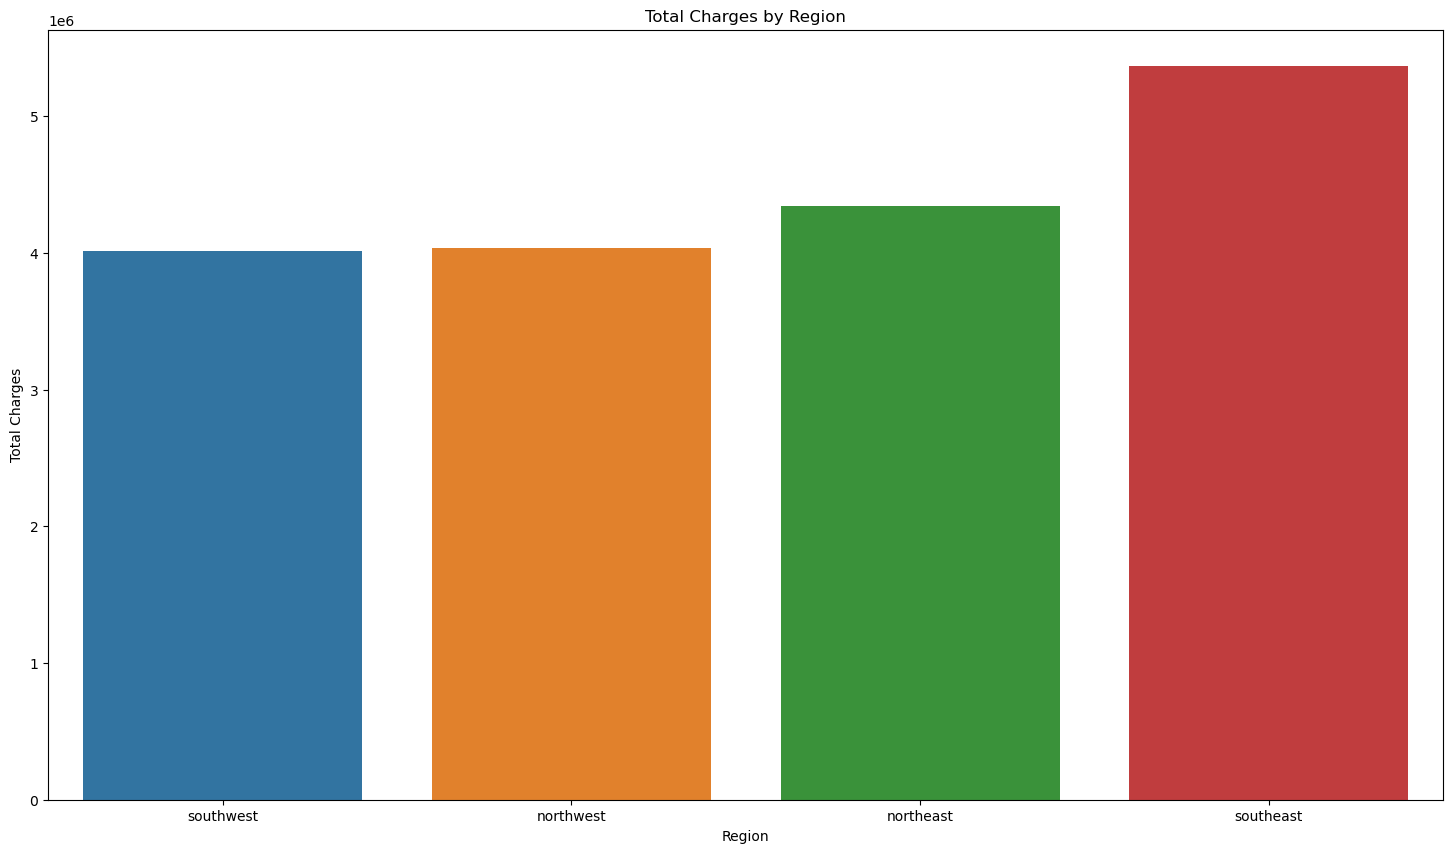

In [14]:
# Calculating the total charges for each region and sort in ascending order
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending=True)

# Creating a bar plot to visualize the total charges for each region
plt.figure(figsize=(18, 10))
ax = sns.barplot(x=charges.index, y=charges)

# Adding labels and title for better interpretation
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Displaying the bar plot
plt.show()

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.

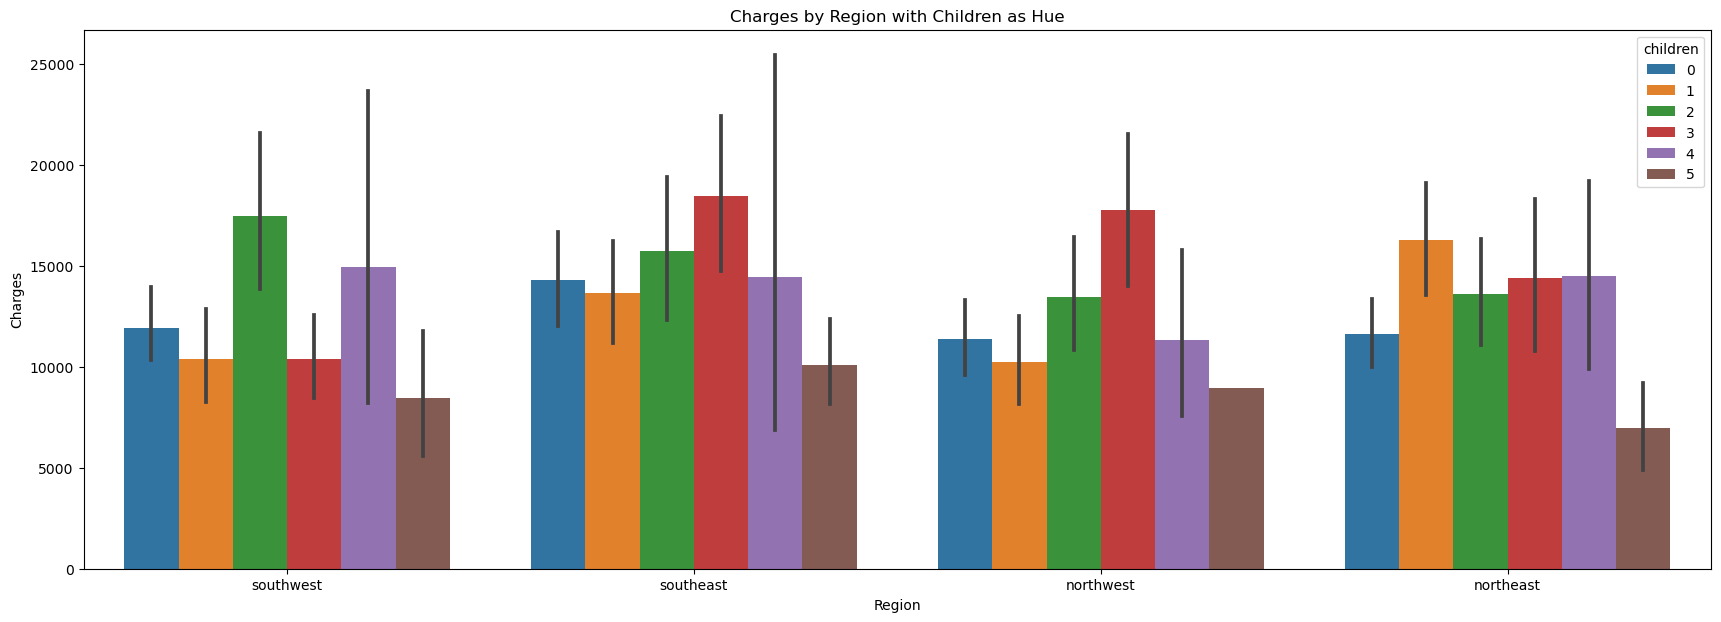

In [15]:
# Creating a bar plot to visualize charges by region, considering the number of children
plt.figure(figsize=(21, 7))
ax = sns.barplot(x='region', y='charges', hue='children', data=df)

# Adding labels and title for better interpretation
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges by Region with Children as Hue')

# Displaying the bar plot
plt.show()

There appears to be no statistically significant difference in how the number of children influences charges across different regions.

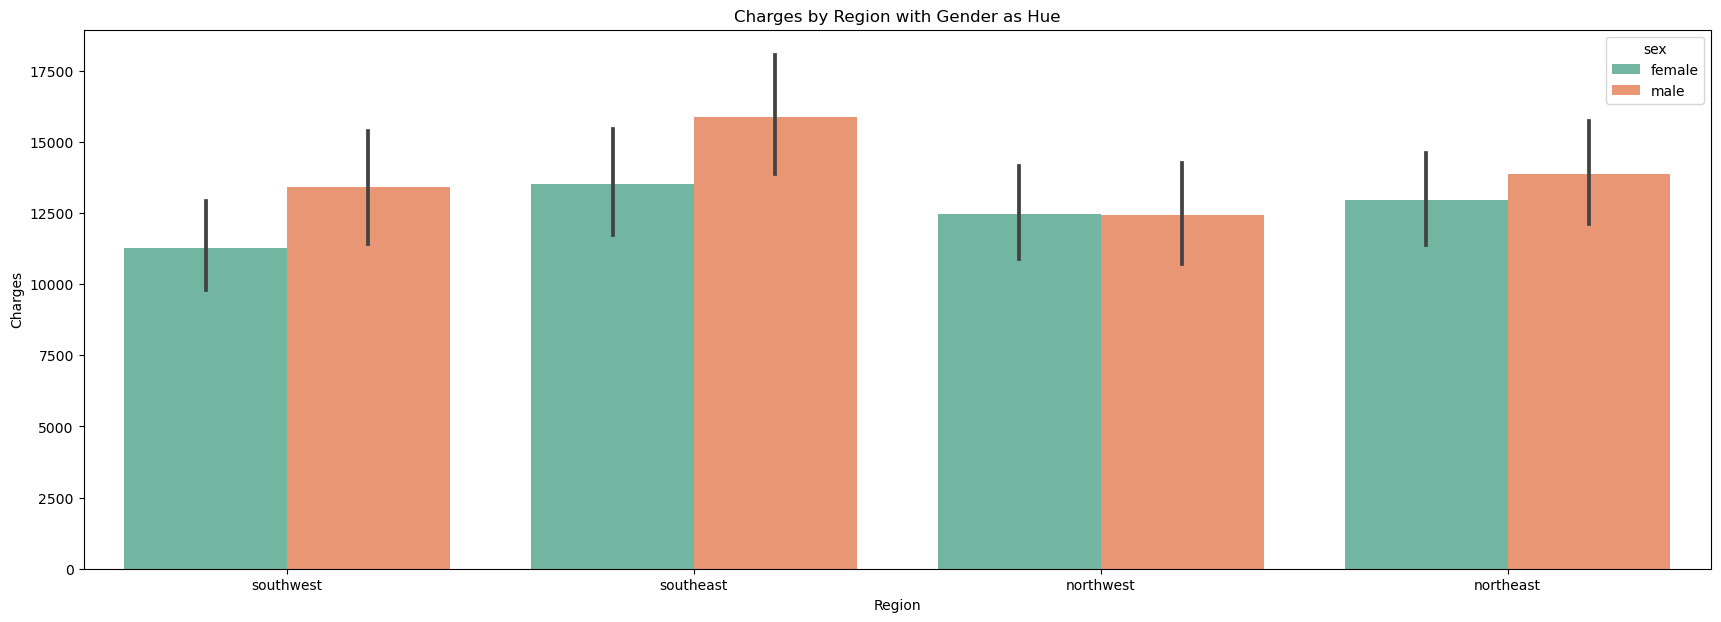

In [16]:
# Creating a bar plot to visualize charges by region, considering gender as the hue parameter
plt.figure(figsize=(21,7))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2')

# Adding labels and title for better interpretation
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges by Region with Gender as Hue')

# Displaying the bar plot
plt.show()

Similar to the previous graph, there appears to be no statistically significant difference in how gender within a specific region influences charges.

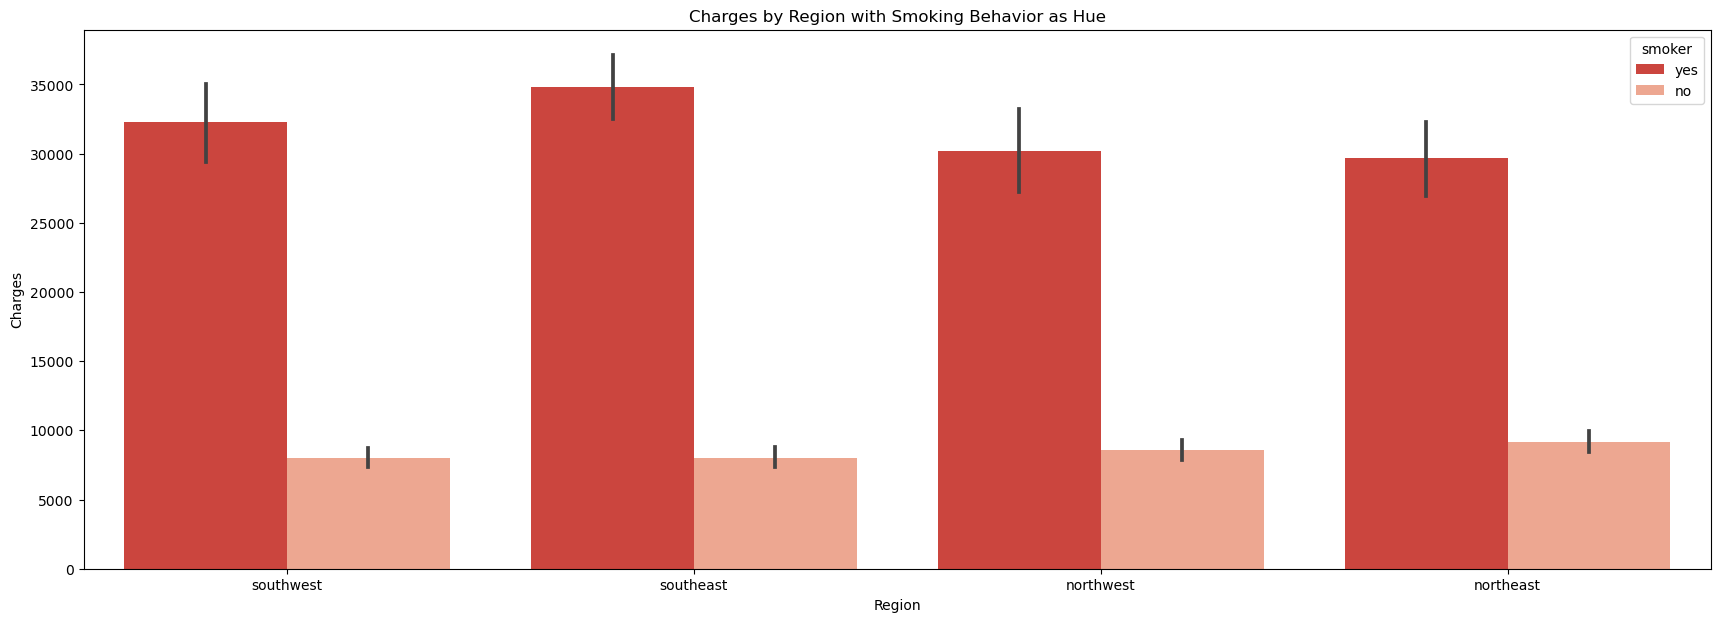

In [17]:
# Creating a bar plot to visualize charges by region, considering smoking behavior as the hue parameter
f, ax = plt.subplots(1, 1, figsize=(21, 7))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r')

# Adding labels and title for better interpretation
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges by Region with Smoking Behavior as Hue')

# Displayingthe bar plot
plt.show()

In contrast to the other factors, there appears to be a statistically significant influence of smoking behavior in a region on medical charges.

Considering the bar charts, it is evident that smoking behavior by region significantly affects medical charges. Consequently, let's examine the correlation between non-categorical variables (age, BMI, and children) and medical charges, with a focus on smoking behavior.

# CHARGES BY AGE, BMI, AND CHILDREN BASED ON SMOKING BEHAVIOR

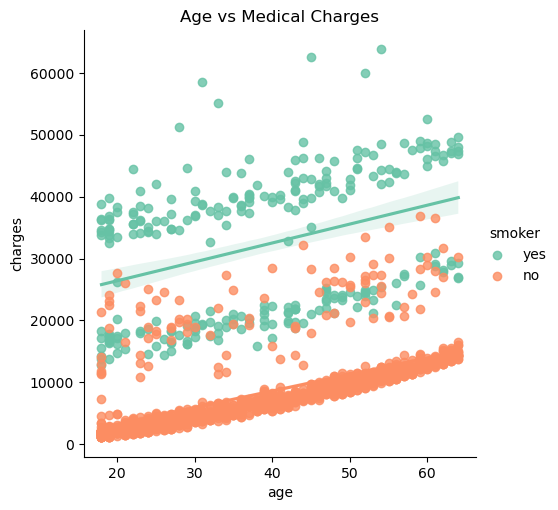

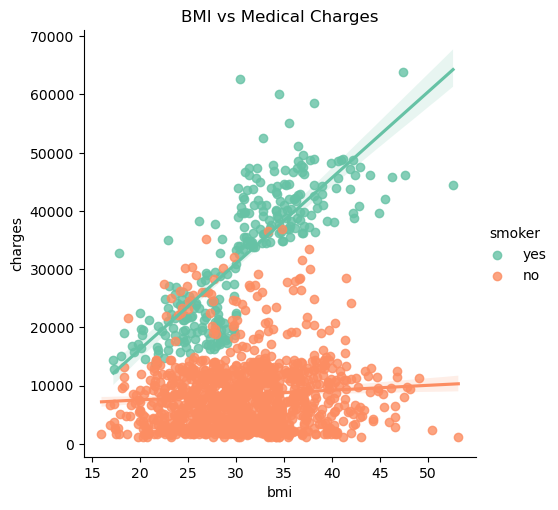

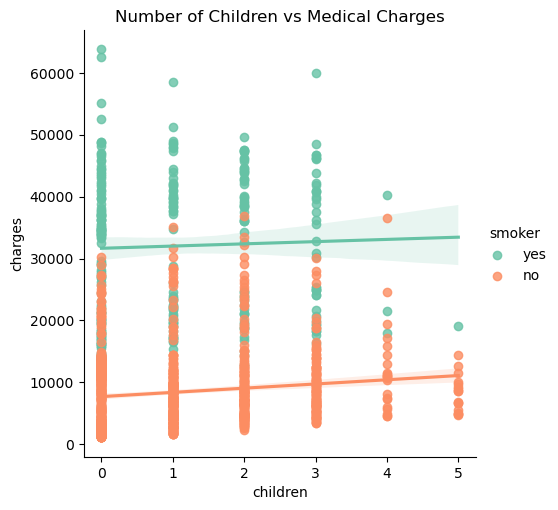

In [18]:
# Scatter plot with regression lines for Age vs. Medical Charges based on smoking behavior
ax = sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set2')
plt.title('Age vs Medical Charges')

# Scatter plot with regression lines for BMI vs. Medical Charges based on smoking behavior
ax = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')
plt.title('BMI vs Medical Charges')

# Scatter plot with regression lines for Number of Children vs. Medical Charges based on smoking behavior
ax = sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='Set2')
plt.title('Number of Children vs Medical Charges')

# Displaying the plots
plt.show()

The analysis underscores the substantial impact of smoking on medical costs. When combined with elevated factors like age, BMI, and the number of children, the influence of smoking intensifies, leading to a notable escalation in medical expenses.

# DATA CORRELATION

To validate our observations, we will assess the correlation between all columns through the creation of a pairplot and a correlation heatmap. To facilitate this analysis, we will first convert all object labels into categorical variables and subsequently transform them into numerical values.

In [19]:
# Converting specific columns to categorical data type
df[['region', 'sex', 'smoker']] = df[['region', 'sex', 'smoker']].astype('category')

# Displaying data types after conversion
# This helps verify that the specified columns are now of categorical data type
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [20]:
# Using LabelEncoder to convert categorical data to numerical type

# Encoding 'region' column
label = LabelEncoder()
label.fit(df['region'].drop_duplicates())
df['region'] = label.transform(df['region'])

# Encoding 'sex' column
label.fit(df['sex'].drop_duplicates())
df['sex'] = label.transform(df['sex'])

# Encoding 'smoker' column
label.fit(df['smoker'].drop_duplicates())
df['smoker'] = label.transform(df['smoker'])

# Displaying data types after conversion
# This helps confirm that the specified columns are now of numerical data type
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [21]:
# Display the first few rows of the DataFrame after data type conversion
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


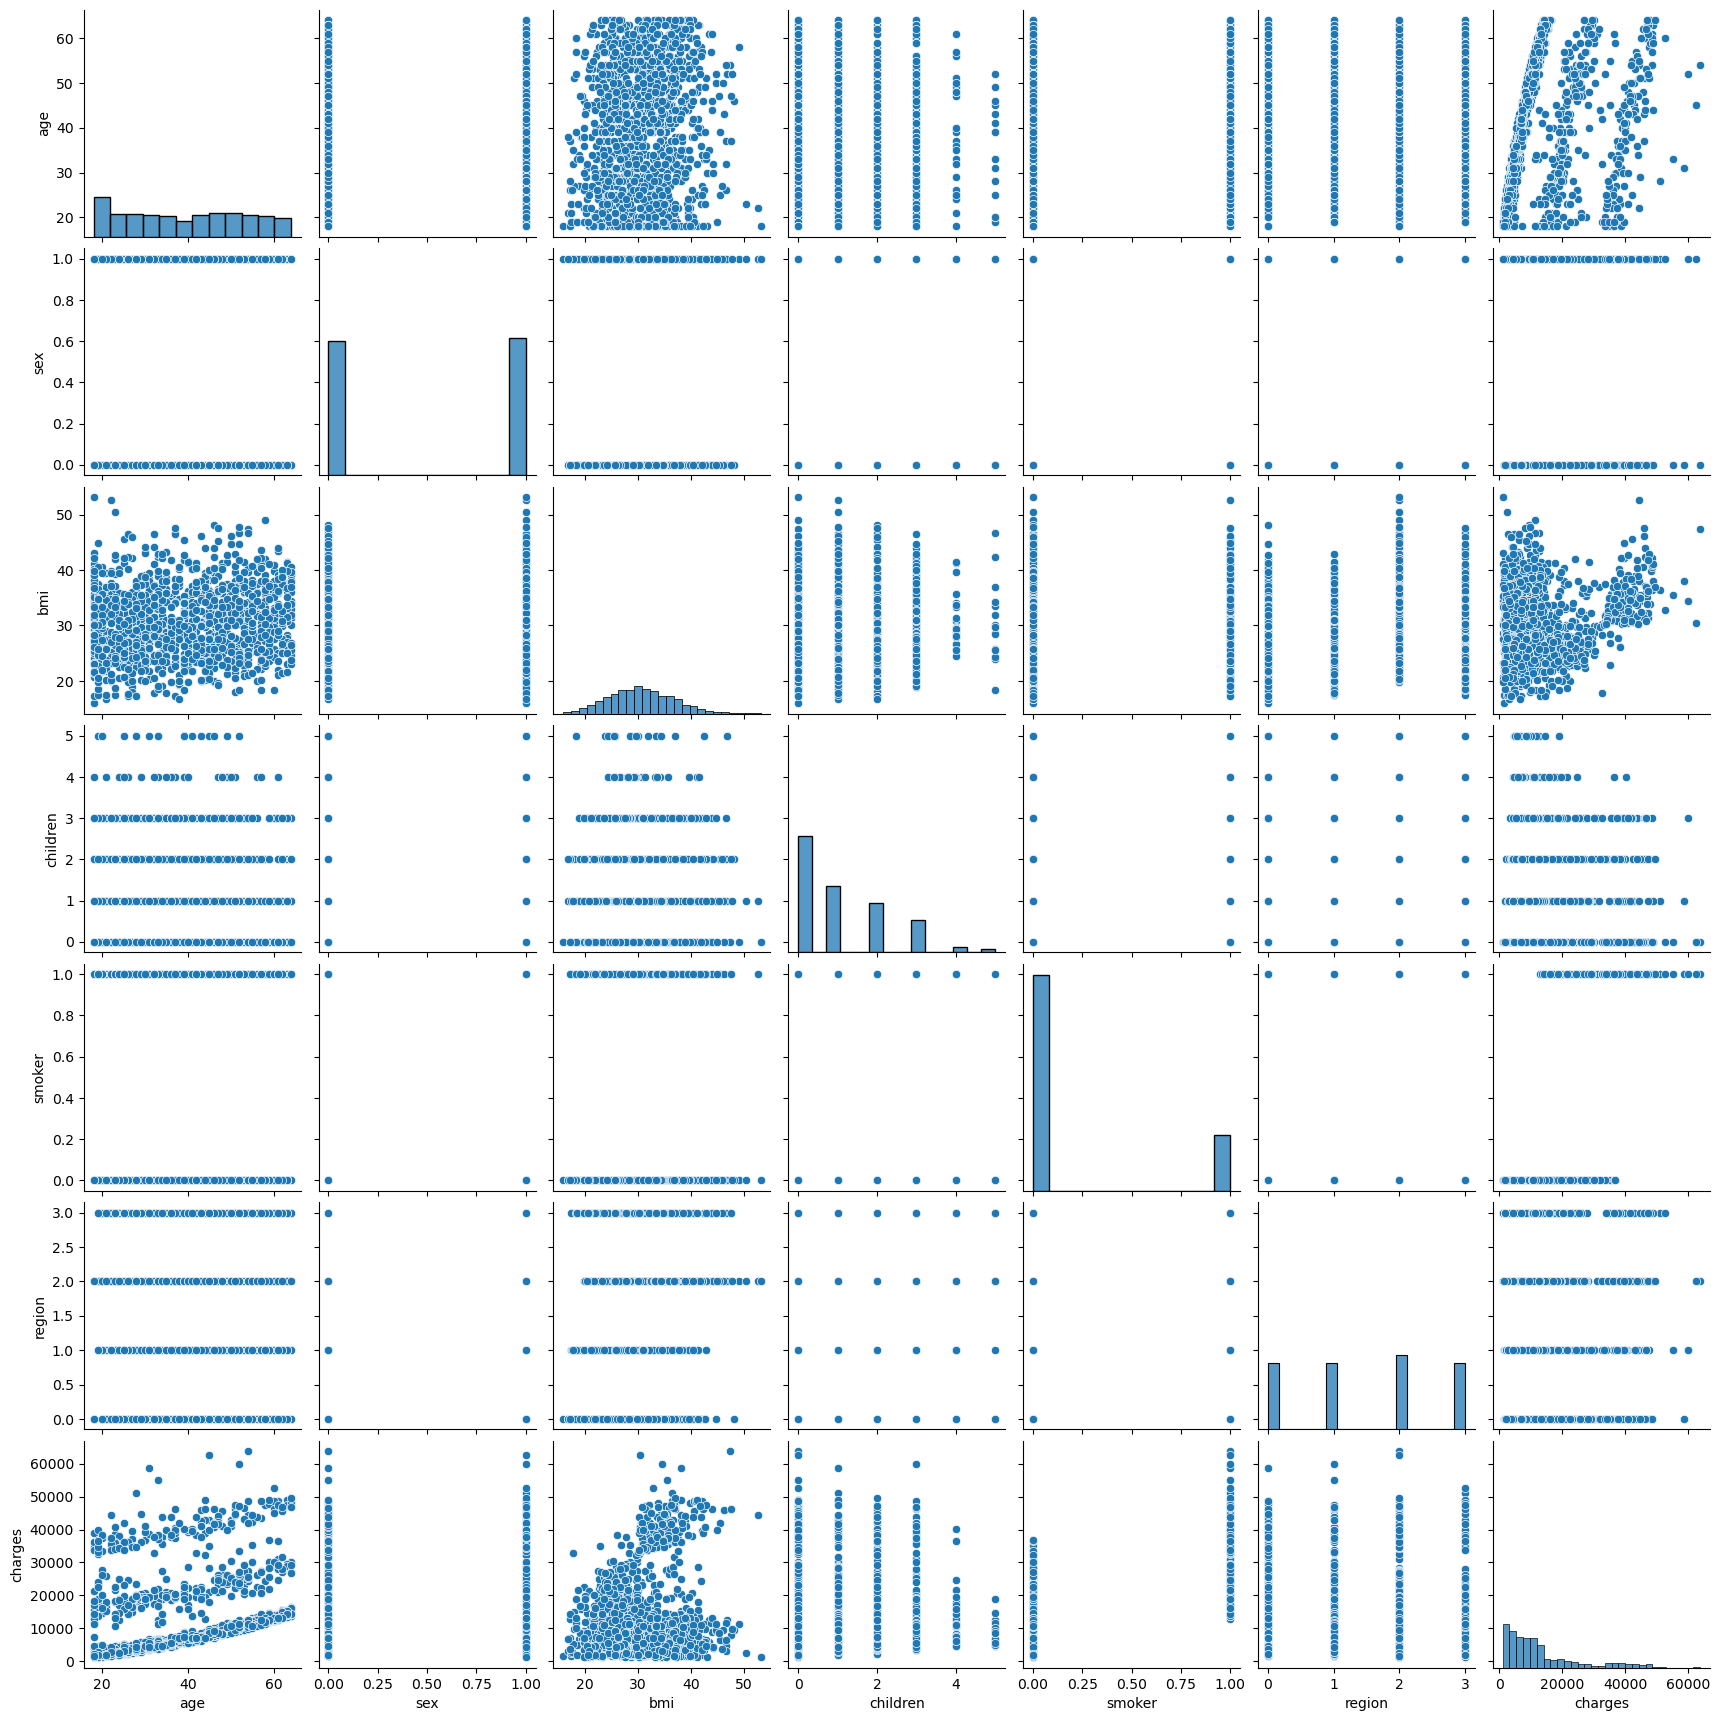

In [22]:
# Creating a pairplot to visualize pairwise relationships in the DataFrame
# This plot includes scatter plots for numerical variables and histograms for each variable on the diagonal
sns.pairplot(df)

# Display the pairplot

Text(0.5, 1.0, 'Correlation Factors Heat Map')

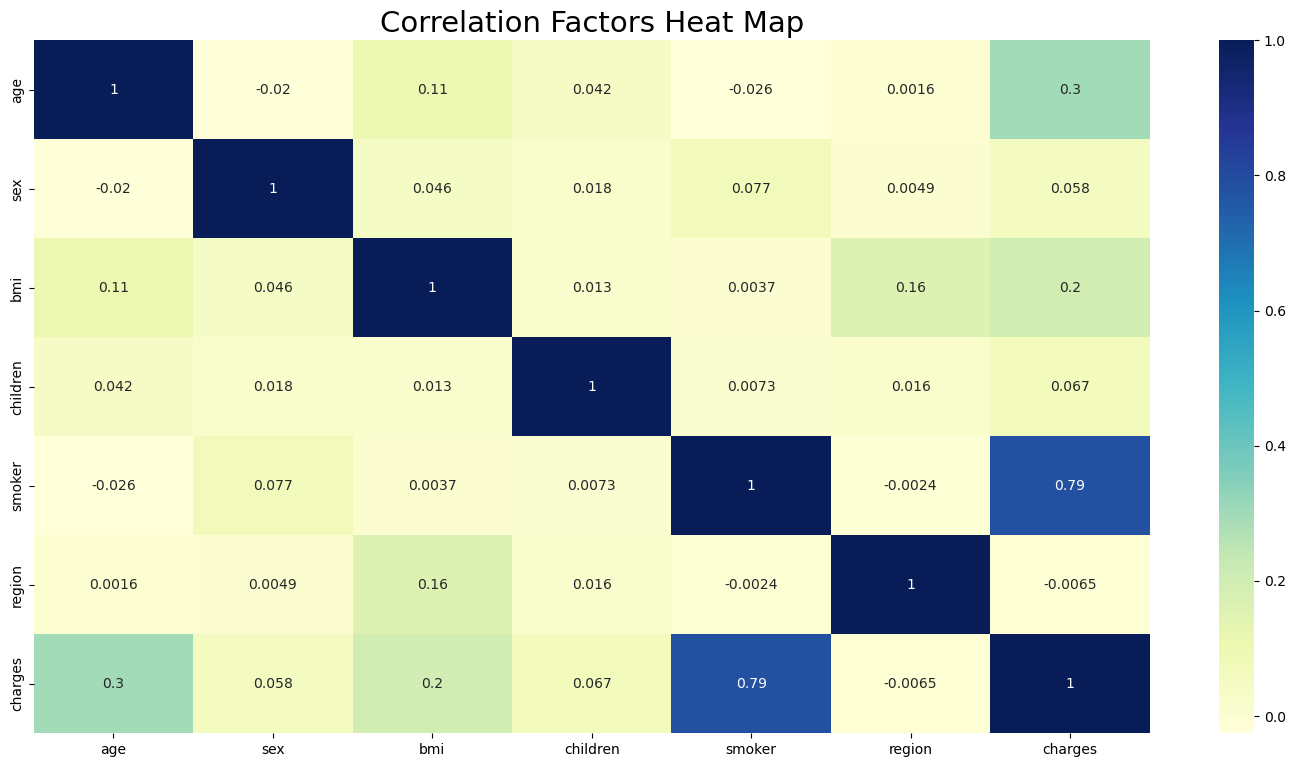

In [23]:
# Creating a heatmap to visualize the correlation matrix of the DataFrame
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# Set the title for the heatmap
plt.title('Correlation Factors Heat Map', size='21')

The heatmap effectively highlights multicollinearity among variables and identifies those with significant collinearity with the target variable (charges). Notably, smoking behavior exhibits the strongest correlation, followed by age and BMI, emphasizing their substantial associations with medical charges.

# PREPARING DATA FOR MACHINE LEARNING

In [24]:
# Creating feature matrix X by excluding the 'charges' column
X = df.drop('charges', axis=1)

# Creating target variable y with the 'charges' column
y = df['charges']

In [25]:
# Spliting the data into training and testing sets using train_test_split
# The test_size=0.2 parameter specifies that 20% of the data will be used for testing
# The random_state=0 parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# DATA MODELING

In [26]:
# Instantiating a Linear Regression model
LR = LinearRegression()

# Fitting the model on the training data
LR.fit(X_train, y_train)

# Making predictions on the test data
y_pred = LR.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))

R2 Score: 0.7526726290709554
MAE: 4400.502490291575


# BEST FIT LINE

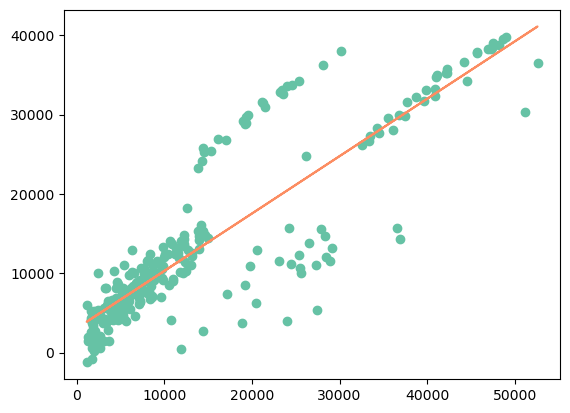

In [27]:
# Setting the color palette for the plot
palette = "Set2"
sns.set_palette(palette)

# Creating a scatter plot to visualize the predicted vs. actual values
plt.plot(y_test, y_pred, 'o')

# Fitting a linear regression line to the scatter plot
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)

# Displaying the plot
plt.show()

In [28]:
# Instantiating a Ridge Regression model with regularization parameter alpha=10
R = Ridge(alpha=10)

# Fitting the Ridge model on the training data
R.fit(X_train, y_train)

# Making predictions on the test data
y_pred = R.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.750129548718422
MAE: 4508.836007618554


In [29]:
# Instantiating a RandomForestRegressor model with specified parameters
RF = RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.75,
                           max_features=0.75,
                           max_depth=15)

# Fitting the RandomForestRegressor model on the training data
RF.fit(X_train, y_train)

# Making predictions on the test data
y_pred = RF.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8441502558295858
MAE: 2852.234054562688


In [30]:
# Instantiating a DecisionTreeRegressor model with max depth set to 3
DT = DecisionTreeRegressor(max_depth=3)

# Fitting the DecisionTreeRegressor model on the training data
DT.fit(X_train, y_train)

# Making predictions on the test data
y_pred = DT.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8305527121929231
MAE: 3222.1058103515065


In [31]:
# Instantiating a Lasso Regression model with regularization parameter alpha=0.001
L = Lasso(alpha=0.001)

# Fitting the Lasso model on the training data
L.fit(X_train, y_train)

# Making predictions on the test data
y_pred = L.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.7526726303757756
MAE: 4400.502800096362


In [32]:
# Instantiating a GradientBoostingRegressor model with 100 estimators
GB = GradientBoostingRegressor(n_estimators=100)

# Fitting the GradientBoostingRegressor model on the training data
GB.fit(X_train, y_train)

# Making predictions on the test data
y_pred = GB.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8481908308676852
MAE: 2773.5258128433547


In [33]:
# Instantiating an XGBoost Regressor model with specified hyperparameters
XG = XGBRegressor(
    n_estimators=50,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of a tree
    learning_rate=0.1  # Step size shrinkage to prevent overfitting
)

# Fitting the XGBoost model on the training data
XG.fit(X_train, y_train)

# Making predictions on the test data
y_pred = XG.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8548969602069479
MAE: 2755.0090877918024


In [34]:
# Instantiating an AdaBoost Regressor model with specified parameters
AB = AdaBoostRegressor(
    n_estimators=100,    # Number of boosting rounds
    learning_rate=1.0    # Step size shrinks the contribution of each base learner
)

# Fitting the AdaBoost model on the training data
AB.fit(X_train, y_train)

# Making predictions on the test data
y_pred = AB.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.816311887431068
MAE: 4263.333004739328


In [35]:
# Instantiating an ExtraTreesRegressor model with specified parameters
ET = ExtraTreesRegressor(
    n_estimators=100,    # Number of trees in the forest
    random_state=3,      # Random seed for reproducibility
    max_samples=0.5,     # Proportion of samples used for each tree
    max_features=0.75,   # Proportion of features used for each tree
    max_depth=15,        # Maximum depth of the tree
    bootstrap=True       # Whether bootstrap samples are used
)

# Fitting the ExtraTreesRegressor model on the training data
ET.fit(X_train, y_train)

# Making predictions on the test data
y_pred = ET.predict(X_test)

# Evaluating the model performance
# Printing R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8448254320064397
MAE: 3028.0972342050354


Considering both the R2 score and Mean Absolute Error (MAE), the XGBoost model stands out as the optimal model.

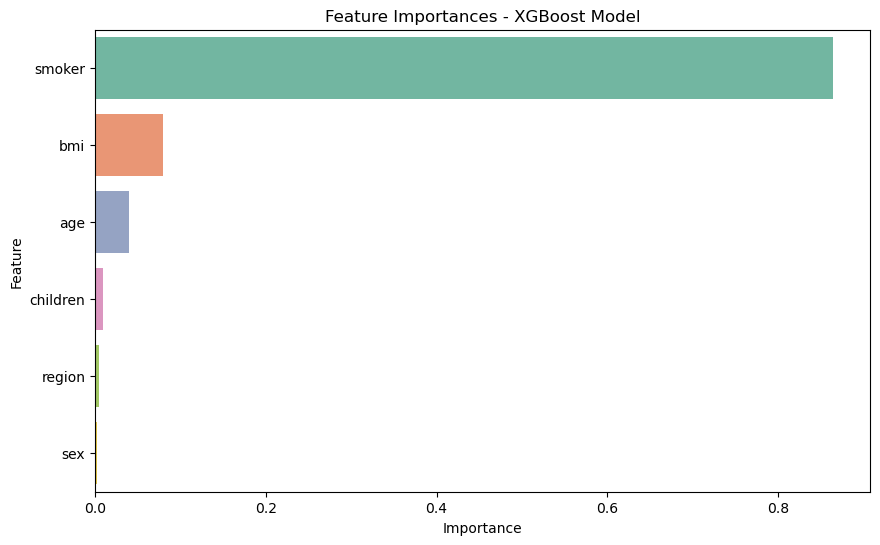

In [39]:
XG.fit(X_train, y_train)

# Getting feature importances
importances = XG.feature_importances_

# Getting feature names
feature_names = X_train.columns

# Creating a DataFrame to hold feature importance data
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

According to the feature importances, it's evident that the 'sex' and 'region' independent variables do not play a substantial role in determining an individual's medical charges or insurance costs.

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = XGBRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the model performance with tuned hyperparameters
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print('R2 Score (Tuned):', r2_tuned)
print('MAE (Tuned):', mae_tuned)


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
R2 Score (Tuned): 0.8548969602069479
MAE (Tuned): 2755.0090877918024


In [43]:
 #XGBoost model (XG) is already trained and available

# Prepare the input features for prediction
# For example, let's create a dictionary with sample input features
sample_input = {
    'age': 30,
    'sex': 1,  # 1 for male, 0 for female
    'bmi': 25.0,
    'children': 2,
    'smoker': 0,  # 0 for non-smoker, 1 for smoker
    'region': 2   # Assuming region is encoded as integers
}

# Convert input features to a DataFrame for consistency with the model input
input_df = pd.DataFrame([sample_input])

# Make a prediction using the trained model
predicted_cost = XG.predict(input_df)[0]

# Display the predicted medical cost
print(f'Predicted Medical Cost: ${predicted_cost:.2f}')


Predicted Medical Cost: $6719.29


The project has effectively crafted a robust machine learning model capable of predicting medical insurance costs. Through this endeavor, meaningful insights have been gleaned, shedding light on the pivotal factors that influence individual medical charges. This predictive model not only contributes to accurate cost estimations for health insurance but also provides a deeper understanding of the intricate dynamics influencing healthcare expenses.

In [45]:
import joblib

# Assuming 'XG' is your trained XGBoost model
# Saving the model to a file
model_filename = 'medical_cost_prediction_model.joblib'
joblib.dump(XG, model_filename)

print(f"Model saved as {model_filename}")

Model saved as medical_cost_prediction_model.joblib
